<a href="https://colab.research.google.com/github/VasanthPrakasam/lung-cancer-dataset/blob/main/lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
df=pd.read_csv('/content/cleaned_lung_cancer_data.csv')
df

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,treatment_duration
0,1,64.0,1,26.0,2016-04-05,0.0,1,3.0,29.4,199.0,0.0,0.0,1.0,0.0,0.0,2017-09-10,0.0,523.0
1,2,50.0,0,19.0,2023-04-20,2.0,1,3.0,41.2,280.0,1.0,1.0,0.0,0.0,3.0,2024-06-17,1.0,424.0
2,3,65.0,0,12.0,2023-04-05,2.0,1,1.0,44.0,268.0,1.0,1.0,0.0,0.0,1.0,2024-04-09,0.0,370.0
3,4,51.0,0,1.0,2016-02-05,0.0,0,3.0,43.0,241.0,1.0,1.0,0.0,0.0,0.0,2017-04-23,0.0,443.0
4,5,37.0,1,17.0,2023-11-29,0.0,0,3.0,19.7,178.0,0.0,0.0,0.0,0.0,1.0,2025-01-08,0.0,406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110849,110850,44.0,1,9.0,2022-12-13,3.0,1,2.0,28.0,195.0,1.0,1.0,1.0,0.0,2.0,2024-06-04,0.0,539.0
110850,110851,50.0,0,26.0,2016-10-29,1.0,1,2.0,17.8,235.0,1.0,1.0,0.0,1.0,3.0,2017-10-13,0.0,349.0
110851,110852,57.0,0,3.0,2023-09-23,2.0,1,1.0,34.9,255.0,1.0,0.0,1.0,0.0,0.0,2025-01-12,0.0,477.0
110852,110853,65.0,1,4.0,2023-10-14,2.0,0,3.0,39.9,250.0,1.0,1.0,1.0,0.0,2.0,2025-01-07,1.0,451.0


In [43]:
for i in df.select_dtypes(include=['object']).columns:
    print(i, df[i].unique())

diagnosis_date ['2016-04-05' '2023-04-20' '2023-04-05' ... '2017-12-27' '2021-04-22'
 '2020-04-02']
end_treatment_date ['2017-09-10' '2024-06-17' '2024-04-09' ... '2015-01-02' '2026-05-03'
 '2026-04-14']


In [44]:
df['diagnosis_date']=pd.to_datetime(df['diagnosis_date'], format='%Y-%m-%d')
df['end_treatment_date']=pd.to_datetime(df['end_treatment_date'], format='%Y-%m-%d')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110854 entries, 0 to 110853
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  110854 non-null  int64         
 1   age                 110854 non-null  float64       
 2   gender              110854 non-null  int64         
 3   country             110854 non-null  float64       
 4   diagnosis_date      110854 non-null  datetime64[ns]
 5   cancer_stage        110854 non-null  float64       
 6   family_history      110854 non-null  int64         
 7   smoking_status      110854 non-null  float64       
 8   bmi                 110854 non-null  float64       
 9   cholesterol_level   110854 non-null  float64       
 10  hypertension        110854 non-null  float64       
 11  asthma              110854 non-null  float64       
 12  cirrhosis           110854 non-null  float64       
 13  other_cancer        110854 no

In [46]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived', 'treatment_duration'],
      dtype='object')

In [47]:
df['id'].nunique()

110854

In [48]:
df.set_index("id", inplace = True) # making id to the index

In [49]:
df

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,treatment_duration
id,,,,,,,,,,,,,,,,,
1,64.0,1,26.0,2016-04-05,0.0,1,3.0,29.4,199.0,0.0,0.0,1.0,0.0,0.0,2017-09-10,0.0,523.0
2,50.0,0,19.0,2023-04-20,2.0,1,3.0,41.2,280.0,1.0,1.0,0.0,0.0,3.0,2024-06-17,1.0,424.0
3,65.0,0,12.0,2023-04-05,2.0,1,1.0,44.0,268.0,1.0,1.0,0.0,0.0,1.0,2024-04-09,0.0,370.0
4,51.0,0,1.0,2016-02-05,0.0,0,3.0,43.0,241.0,1.0,1.0,0.0,0.0,0.0,2017-04-23,0.0,443.0
5,37.0,1,17.0,2023-11-29,0.0,0,3.0,19.7,178.0,0.0,0.0,0.0,0.0,1.0,2025-01-08,0.0,406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110850,44.0,1,9.0,2022-12-13,3.0,1,2.0,28.0,195.0,1.0,1.0,1.0,0.0,2.0,2024-06-04,0.0,539.0
110851,50.0,0,26.0,2016-10-29,1.0,1,2.0,17.8,235.0,1.0,1.0,0.0,1.0,3.0,2017-10-13,0.0,349.0
110852,57.0,0,3.0,2023-09-23,2.0,1,1.0,34.9,255.0,1.0,0.0,1.0,0.0,0.0,2025-01-12,0.0,477.0


In [50]:
df.isnull().sum()

,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0
hypertension,0


In [51]:
pd.set_option('display.max_columns', None)

In [52]:
df.corr()

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,treatment_duration
age,1.000000,0.002307,-0.003864,-0.001622,-0.002171,0.001662,0.002555,0.001529,0.002481,-0.001886,-0.001952,-0.002034,0.002426,0.003907,-0.001483,0.000543,0.000949
gender,0.002307,1.000000,-0.002196,0.000051,-0.001847,-0.001119,-0.006612,0.000320,-0.001809,-0.001566,0.002306,0.001324,-0.001956,0.006802,0.001080,0.004145,0.007849
country,-0.003864,-0.002196,1.000000,-0.002376,-0.005546,-0.004963,0.003303,0.001222,0.000868,-0.001591,-0.001286,0.000550,0.003089,-0.000194,-0.002420,-0.000397,-0.000493
diagnosis_date,-0.001622,0.000051,-0.002376,1.000000,-0.002457,-0.002222,-0.003031,0.000843,0.000108,0.000327,0.004600,0.000339,-0.004396,0.000168,0.991361,0.002139,0.001457
cancer_stage,-0.002171,-0.001847,-0.005546,-0.002457,1.000000,-0.003435,0.004516,-0.000802,-0.001806,0.006606,-0.006861,-0.002908,0.000598,-0.000525,-0.040426,0.003284,-0.289639
family_history,0.001662,-0.001119,-0.004963,-0.002222,-0.003435,1.000000,-0.003606,0.000428,0.000041,-0.004914,-0.003140,0.002034,0.001350,0.003629,-0.002035,-0.002198,0.001276
smoking_status,0.002555,-0.006612,0.003303,-0.003031,0.004516,-0.003606,1.000000,0.000099,0.001899,-0.000737,-0.000598,-0.000136,-0.002129,-0.002786,-0.002865,-0.001621,0.001060
bmi,0.001529,0.000320,0.001222,0.000843,-0.000802,0.000428,0.000099,1.000000,0.747553,0.001906,0.000012,0.000571,-0.001057,-0.001993,0.000369,-0.004454,-0.003557
cholesterol_level,0.002481,-0.001809,0.000868,0.000108,-0.001806,0.000041,0.001899,0.747553,1.000000,0.002282,0.000301,-0.000637,-0.003107,-0.004698,-0.000607,-0.002748,-0.005446
hypertension,-0.001886,-0.001566,-0.001591,0.000327,0.006606,-0.004914,-0.000737,0.001906,0.002282,1.000000,0.105443,0.096819,0.074503,0.005045,-0.001357,-0.003812,-0.012815


In [53]:
# according to correlation test below columns are less impact to the data
# age,gender,country, diagonis date, Family history, smoking status,Treatment type, survived,
# day_diagnosis_date,week_diagnosis_date,day_end_treatment_date,week_end_treatment_date

In [54]:
df

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,treatment_duration
id,,,,,,,,,,,,,,,,,
1,64.0,1,26.0,2016-04-05,0.0,1,3.0,29.4,199.0,0.0,0.0,1.0,0.0,0.0,2017-09-10,0.0,523.0
2,50.0,0,19.0,2023-04-20,2.0,1,3.0,41.2,280.0,1.0,1.0,0.0,0.0,3.0,2024-06-17,1.0,424.0
3,65.0,0,12.0,2023-04-05,2.0,1,1.0,44.0,268.0,1.0,1.0,0.0,0.0,1.0,2024-04-09,0.0,370.0
4,51.0,0,1.0,2016-02-05,0.0,0,3.0,43.0,241.0,1.0,1.0,0.0,0.0,0.0,2017-04-23,0.0,443.0
5,37.0,1,17.0,2023-11-29,0.0,0,3.0,19.7,178.0,0.0,0.0,0.0,0.0,1.0,2025-01-08,0.0,406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110850,44.0,1,9.0,2022-12-13,3.0,1,2.0,28.0,195.0,1.0,1.0,1.0,0.0,2.0,2024-06-04,0.0,539.0
110851,50.0,0,26.0,2016-10-29,1.0,1,2.0,17.8,235.0,1.0,1.0,0.0,1.0,3.0,2017-10-13,0.0,349.0
110852,57.0,0,3.0,2023-09-23,2.0,1,1.0,34.9,255.0,1.0,0.0,1.0,0.0,0.0,2025-01-12,0.0,477.0


In [55]:
df.columns

Index(['age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived', 'treatment_duration'],
      dtype='object')

In [56]:
continuous = ['age','diagnosis_date', 'bmi', 'cholesterol_level','treatment_type','end_treatment_date','treatment_duration']
categories= [ 'gender', 'country', 'cancer_stage','family_history', 'smoking_status','hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type','survived','year_diagnosis_date', 'month_diagnosis_date', 'day_diagnosis_date','week_diagnosis_date', 'year_end_treatment_date\t','month_end_treatment_date', 'day_end_treatment_date','week_end_treatment_date']

In [57]:
from scipy import stats

In [58]:
#continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.1:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False


In [59]:
two_sample(df["bmi"],df["cholesterol_level"])

False

In [60]:
#cat vs cat
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.1 else False

In [61]:
chisquare_cat_vs_cat(df["family_history"],df["cancer_stage"])

False

In [62]:
#continious(d1) vs cat(d2)
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        data[i]=df[d1][df[d2]==i]
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.1 else True

In [63]:
annova_test("family_history","cancer_stage")

True

In [64]:
final = {}
# Exclude datetime columns from the list of columns to iterate through
cols_to_analyze = [col for col in df.columns if col not in ['diagnosis_date', 'end_treatment_date']]

for i in cols_to_analyze:
    final[i]={}
    for j in cols_to_analyze:
        if (i in continuous) and (j in continuous):
            result=two_sample(df[i],df[j])
        elif (i in continuous) and (j in categories):
            result=annova_test(i,j)
        elif (i in categories) and (j in continuous):
            result=annova_test(j,i)
        elif (i in categories) and (j in categories):
            result=chisquare_cat_vs_cat(df[i],df[j])
        else:
            # If the columns are of mixed types not covered by the above or one is a date, skip the test
            continue

        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [65]:
import pprint

In [66]:
pprint.pprint(final)

{'age': {'age': 1,
         'asthma': 1,
         'bmi': 0,
         'cancer_stage': 1,
         'cholesterol_level': 0,
         'cirrhosis': 1,
         'country': 1,
         'family_history': 1,
         'gender': 1,
         'hypertension': 1,
         'other_cancer': 1,
         'smoking_status': 1,
         'survived': 1,
         'treatment_duration': 0,
         'treatment_type': 0},
 'asthma': {'age': 1,
            'asthma': 1,
            'bmi': 1,
            'cancer_stage': 1,
            'cholesterol_level': 1,
            'cirrhosis': 1,
            'country': 0,
            'family_history': 0,
            'gender': 0,
            'hypertension': 1,
            'other_cancer': 1,
            'smoking_status': 0,
            'survived': 0,
            'treatment_duration': 1,
            'treatment_type': 1},
 'bmi': {'age': 0,
         'asthma': 1,
         'bmi': 1,
         'cancer_stage': 1,
         'cholesterol_level': 0,
         'cirrhosis': 1,
         'country

In [67]:
final_df = pd.DataFrame(final)
final_df

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration
age,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0
gender,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0
country,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1
cancer_stage,1,0,0,1,0,1,1,1,1,1,0,0,1,0,0
family_history,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1
smoking_status,1,1,0,1,0,1,1,1,0,0,0,0,1,0,1
bmi,0,1,1,1,1,1,1,0,1,1,1,1,0,1,0
cholesterol_level,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0
hypertension,1,0,0,1,0,0,1,1,1,1,1,1,0,0,0
asthma,1,0,0,1,0,0,1,1,1,1,1,1,1,0,1


In [68]:
import seaborn as sns

<Axes: >

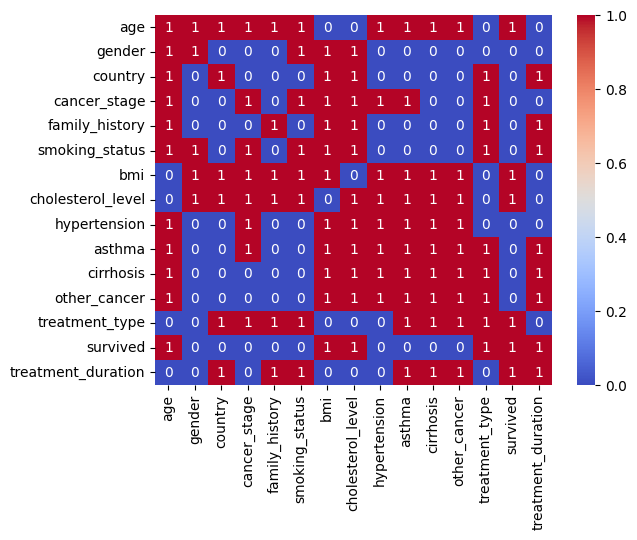

In [69]:
sns.heatmap(final_df,annot=True,cmap="coolwarm")